<a href="https://colab.research.google.com/github/lidyaanggreni/FinalProjectDatminGroupD/blob/main/Kelompok_D_Project_Akhir_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><strong>ANALISIS RESPON MASYARAKAT TERHADAP PIALA DUNIA 2022 PADA MEDIA SOSIAL TWITTER MENGGUNAKAN METODE SOCIAL NETWORK ANALYSIS</strong></h1></center>

**Kelompok D**
1. Azizah Annurohmah (2006572983)
2. Natania Agustin (2006572895)
3. Ni Made Lidya Anggreni (2006522700)
4. Siskawati Simandalahi (2006572970)
5. Yemima Kathleen Monica (2006528982)
6. Yovela Natalia Yvone (2006463894)

**Tautan Video Presentasi**

Google Drive : https://drive.google.com/file/d/1G42uWtEI7EQDUgXGsEpMlgJsElynStpu/view?usp=drivesdk

YouTube (alternatif) : https://youtu.be/CE3UyqXFLps

#Install dan Import Module yang Dibutuhkan

In [ ]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Library
import tweepy
import pandas as pd
import numpy as np

In [ ]:
import json

from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import StreamListener

class Listener(StreamListener):
  
   def on_data(self, data):
      
        all_data = json.loads(data)

        tweet = all_data.get("text")
        print(tweet)
        return True

In [ ]:
# replace your keys 
API_KEY= "CFa8KFqRA40pOnxDJuKnBz9H9"
API_SECRET = "ZGTSsnAyVlUYF3RmVzO2Jum7BvGSKTtJ07NIGmX8CcyaaPJ61z"
ACCESS_TOKEN  = "3237893606-p1la7j7EGvvmEIeRtBxDSIGQDtKgN6WfvgkP3dK"
ACCESS_TOKEN_SECRET = "A6sUYYX0JrKTlyBZUVGQ5ZI9b1GHL31IP6TojFXH82zwm"

# Auth.
auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

In [ ]:
!pip install --upgrade git+https://github.com/kevctae/twint.git
!pip install nest_asyncio

In [ ]:
import nltk

!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/corpus_sederhana.txt
!wget -P / https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/lib/taudataNlpTm.py
!pip install unidecode textblob sastrawi
nltk.download('popular')


import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns 
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm

factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170


import twint
import nest_asyncio
import pandas as pd
import networkx as nx

nest_asyncio.apply()
config = twint.Config()
config.Hide_output = True
config.Pandas = True
config.Retweets = True
config.Profile_full = True

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Mengambil Data Piala Dunia dari Twitter

In [ ]:
#mengambil data piala dunia, sel ini tidak perlu dijalankan lagi karena data sudah diload ke github
qry = "piala dunia 2022"
config.Search = qry
config.Limit = 11000

twint.run.Search(config)
data = twint.storage.panda.Tweets_df
del twint, config, nest_asyncio
print(data.shape)
data = data.rename({'username': 'user'}, axis=1) 
data.head()

(11007, 38)


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1608447251902529539,1608447251902529539,1.672319e+12,2022-12-29 12:58:03,+0000,,Pemain Polandia dengan Menit Bermain Terbanyak...,in,[],[],...,,,,,,[],,,,
1,1608446414409039873,1608446414409039873,1.672318e+12,2022-12-29 12:54:43,+0000,,"Kylian Mbappe Sudah Lupakan Piala Dunia 2022, ...",in,"[kylianmbappe, pialadunia2022, psg]",[],...,,,,,,[],,,,
2,1608445520099565574,1608445520099565574,1.672318e+12,2022-12-29 12:51:10,+0000,,6 Pemain Timnas Kroasia dengan Caps Tersedikit...,in,[],[],...,,,,,,[],,,,
3,1608444524157874176,1608444524157874176,1.672318e+12,2022-12-29 12:47:12,+0000,,Presiden turki sebut cristiano ronaldo korban ...,in,[],[],...,,,,,,[],,,,
4,1608441870857949185,1608441870857949185,1.672317e+12,2022-12-29 12:36:40,+0000,,Jangan Ragukan Sinegritas TNI - POLRI Jaga NKR...,in,"[kamitidakpernahtakut, kamitidaktakut, polisi,...",[],...,,,,,,[],,,,


In [ ]:
#meng-export data ke csv, sel ini tidak perlu dijalankan lagi karena data sudah diload ke github
data.to_csv('datapildun2022.csv',encoding="utf8")

In [ ]:
#load data dari github
import pandas as pd
url = 'https://raw.githubusercontent.com/lidyaanggreni/FinalProjectDatminGroupD/main/datapildun2022.csv'
df = pd.read_csv(url,sep=',')
df

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1608447251902529539,1608447251902529539,1672318683000.0,2022-12-29 12:58:03,0,NaN,Pemain Polandia dengan Menit Bermain Terbanyak...,in,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,1608446414409039873,1608446414409039873,1672318483000.0,2022-12-29 12:54:43,0,NaN,"Kylian Mbappe Sudah Lupakan Piala Dunia 2022, ...",in,"['kylianmbappe', 'pialadunia2022', 'psg']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,1608445520099565574,1608445520099565574,1672318270000.0,2022-12-29 12:51:10,0,NaN,6 Pemain Timnas Kroasia dengan Caps Tersedikit...,in,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,1608444524157874176,1608444524157874176,1672318032000.0,2022-12-29 12:47:12,0,NaN,Presiden turki sebut cristiano ronaldo korban ...,in,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4,1608441870857949185,1608441870857949185,1672317400000.0,2022-12-29 12:36:40,0,NaN,Jangan Ragukan Sinegritas TNI - POLRI Jaga NKR...,in,"['kamitidakpernahtakut', 'kamitidaktakut', 'po...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,11002,1604543319404875777,1604543319404875777,1671387912000.0,2022-12-18 18:25:12,0,NaN,"piala dunia 2022 telah usai, mari kita berdam...",in,"['indonesiamasukpialadunia2026', 'sayasiapduku...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
11004,11003,1604543315432869888,1604543315432869888,1671387912000.0,2022-12-18 18:25:12,0,NaN,Messi di Barcelona disponsorin Qatar Foundatio...,in,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
11005,11004,1604543287591075840,1604543287591075840,1671387905000.0,2022-12-18 18:25:05,0,NaN,1 kata buat piala dunia tahun 2022 ✨mevvah✨,in,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
11006,11005,1604543262366527488,1604543262366527488,1671387899000.0,2022-12-18 18:24:59,0,NaN,Kirane sesuk isuk enek sing disapa tp cemberut...,in,['pialadunia2022'],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


#Data Cleaning

In [ ]:
#drop duplicates
df.drop_duplicates(subset='tweet', keep='first', inplace=True, ignore_index=False)
df.shape

(10701, 39)

In [ ]:
#mengecheck apakah ada missing value
df.isnull().sum()

Unnamed: 0             0
id                     0
conversation_id        0
created_at             0
date                   0
timezone               0
place              10688
tweet                  0
language               1
hashtags               1
cashtags               1
user_id                1
user_id_str            1
user                   1
name                   2
day                    1
hour                   1
link                   1
urls                   1
photos                 2
video                  1
thumbnail           7923
retweet                2
nlikes                 2
nreplies               2
nretweets              2
quote_url          10539
search                 1
near               10701
geo                10701
source             10701
user_rt_id         10701
user_rt            10701
retweet_id         10701
reply_to               2
retweet_date       10701
translate          10701
trans_src          10701
trans_dest         10701
dtype: int64

In [ ]:
#drop kolom yang banyak memuat missing value
df2=df.drop(columns=['quote_url','near','geo','source','user_rt_id','user_rt','retweet_id','retweet_date','translate','trans_src','trans_dest','place','thumbnail','quote_url'])

In [ ]:
df2

,Unnamed: 0,id,conversation_id,created_at,date,timezone,tweet,language,hashtags,cashtags,...,link,urls,photos,video,retweet,nlikes,nreplies,nretweets,search,reply_to
0,0,1608447251902529539,1608447251902529539,1672318683000.0,2022-12-29 12:58:03,0,Pemain Polandia dengan Menit Bermain Terbanyak...,in,[],[],...,https://twitter.com/idntimes/status/1608447251...,['https://www.idntimes.com/sport/soccer/christ...,[],0,False,0.0,0.0,0.0,piala dunia 2022,[]
1,1,1608446414409039873,1608446414409039873,1672318483000.0,2022-12-29 12:54:43,0,"Kylian Mbappe Sudah Lupakan Piala Dunia 2022, ...",in,"['kylianmbappe', 'pialadunia2022', 'psg']",[],...,https://twitter.com/nandaputrafbs/status/16084...,['https://holopis.com/news/olahraga/2022/12/29...,[],0,False,0.0,0.0,0.0,piala dunia 2022,[]
2,2,1608445520099565574,1608445520099565574,1672318270000.0,2022-12-29 12:51:10,0,6 Pemain Timnas Kroasia dengan Caps Tersedikit...,in,[],[],...,https://twitter.com/idntimes/status/1608445520...,['https://www.idntimes.com/sport/soccer/christ...,[],0,False,0.0,0.0,0.0,piala dunia 2022,[]
3,3,1608444524157874176,1608444524157874176,1672318032000.0,2022-12-29 12:47:12,0,Presiden turki sebut cristiano ronaldo korban ...,in,[],[],...,https://twitter.com/NOGOAL_STUDIO/status/16084...,['https://youtu.be/Ws-drc00laU'],['https://pbs.twimg.com/media/FlJXxN3aMAAtflK....,1,False,0.0,0.0,0.0,piala dunia 2022,[]
4,4,1608441870857949185,1608441870857949185,1672317400000.0,2022-12-29 12:36:40,0,Jangan Ragukan Sinegritas TNI - POLRI Jaga NKR...,in,"['kamitidakpernahtakut', 'kamitidaktakut', 'po...",[],...,https://twitter.com/DeandraSlavina/status/1608...,[],[],1,False,0.0,0.0,0.0,piala dunia 2022,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,11002,1604543319404875777,1604543319404875777,1671387912000.0,2022-12-18 18:25:12,0,"piala dunia 2022 telah usai, mari kita berdam...",in,"['indonesiamasukpialadunia2026', 'sayasiapduku...",[],...,https://twitter.com/ka_kuukk/status/1604543319...,[],[],0,False,0.0,0.0,0.0,piala dunia 2022,[]
11004,11003,1604543315432869888,1604543315432869888,1671387912000.0,2022-12-18 18:25:12,0,Messi di Barcelona disponsorin Qatar Foundatio...,in,[],[],...,https://twitter.com/annynoey/status/1604543315...,[],[],0,False,0.0,0.0,0.0,piala dunia 2022,[]
11005,11004,1604543287591075840,1604543287591075840,1671387905000.0,2022-12-18 18:25:05,0,1 kata buat piala dunia tahun 2022 ✨mevvah✨,in,[],[],...,https://twitter.com/co2tiger/status/1604543287...,[],[],0,False,0.0,0.0,0.0,piala dunia 2022,[]
11006,11005,1604543262366527488,1604543262366527488,1671387899000.0,2022-12-18 18:24:59,0,Kirane sesuk isuk enek sing disapa tp cemberut...,in,['pialadunia2022'],[],...,https://twitter.com/wm_pk/status/1604543262366...,[],[],0,False,0.0,0.0,0.0,piala dunia 2022,[]


In [ ]:
#melihat isi tweet baris pertama
df3=df2[['tweet']]
df3.at[0,'tweet']

'Pemain Polandia dengan Menit Bermain Terbanyak di Piala Dunia 2022  https://t.co/S7OdxZp7i6'

In [ ]:
#Loading Stopwords

Sastrawi_StopWords_id = factory.get_stop_words()

print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
#membuat fungsi untuk cleaning data
def cleanText(txt):
    docx = unidecode(unescape(txt.lower().strip()))
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) #Remove links
    docx = re.sub(r'[^\w]', ' ', docx) #Remove Symbol
    Tokens = TextBlob(docx).words #Tokenisasi 
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) #Stopwords filtering
    docx = stemmer.stem(docx)
    return docx

In [ ]:
#membuat df untuk clean tweet
#Dipakai iterrows supaya "prosesnya terlihat"

df3['clean_tweet'] = '' # inititate kolom kosong
for idx, post in tqdm(df3.iterrows()):
    df3.at[idx, 'clean_tweet'] = cleanText(post.tweet)
    
df3.head()

10701it [27:14,  6.55it/s]


,tweet,clean_tweet
0,Pemain Polandia dengan Menit Bermain Terbanyak...,main polandia menit main banyak piala dunia 2022
1,"Kylian Mbappe Sudah Lupakan Piala Dunia 2022, ...",kylian mbappe lupa piala dunia 2022 fokus bawa...
2,6 Pemain Timnas Kroasia dengan Caps Tersedikit...,main timnas kroasia caps sedikit piala dunia 2022
3,Presiden turki sebut cristiano ronaldo korban ...,presiden turki sebut cristiano ronaldo korban ...
4,Jangan Ragukan Sinegritas TNI - POLRI Jaga NKR...,jangan ragu sinegritas tni polri jaga nkri kam...


In [ ]:
#mengubah data ke csv
df3[['clean_tweet']].to_csv("tweet bersih.txt", index=False, encoding='utf8', header=False)

#Visualisasi Text Menggunakan Voyant

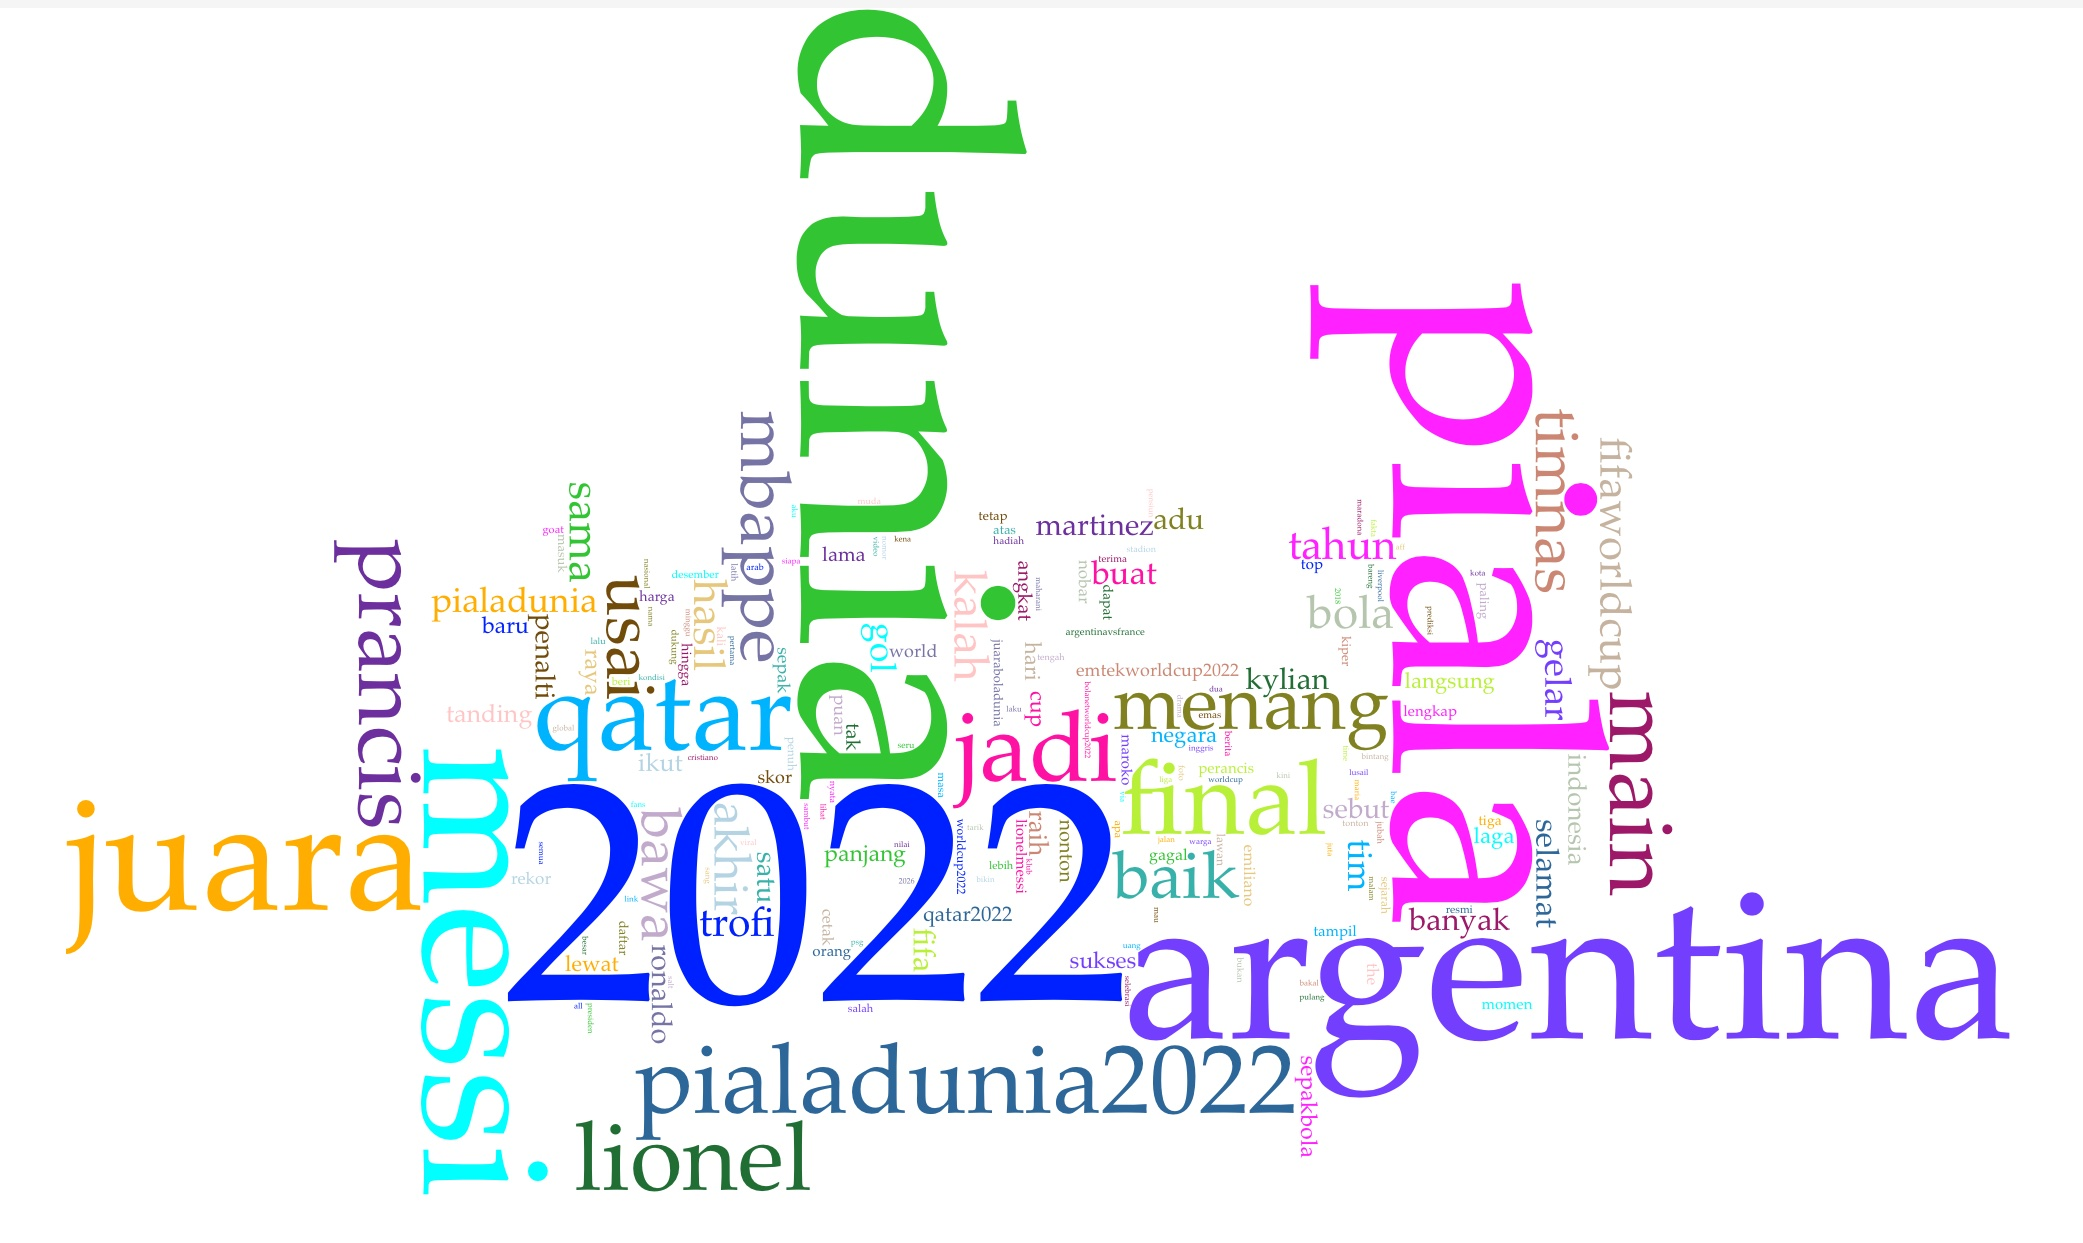

Intepretasi:
Berdasarkan analisis teks menggunakan voyant, dari total 179.241 kata dengan 11.456 kata unik diperoleh beberapa kata yang frekuensinya sering muncul diantaranya yaitu “dunia” (11134 kali), “piala” (10955 kali), “2022” (10519 kali), “argentina” (5908 kali), “messi” (3820 kali), "qatar" (2285 kali), "prancis" (1533 kali), dan "mbappe" (963 kali).
Kata dengan frekuensi terbanyak adalah “dunia” sebanyak 6.21%. Kemunculan dari kata-kata “piala”, “dunia”, “2022” tersebut dikarenakan selaras dengan judul topik yang dipilih yaitu mengenai piala dunia 2022 sehingga kata-kata tersebut muncul dengan frekuensi yang paling banyak dibandingkan kata-kata lain. Kemudian disusul dengan kata “argentina” dan “messi” dikarenakan argentina adalah tim terkenal yang memiliki banyak penggemar dan berhasil mengakhiri penantian juara usai 36 tahun dan Messi yang merupakan salah satu pemain argentina paling banyak disorot dalam piala dunia karena ini merupakan piala dunia terakhir dalam kariernya dan akhirnya mendapat julukan GOAT. Terdapat juga "qatar" yang merupakan tempat piala dunia 2022 ini dilaksanakan. Selanjutnya, banyaknya frekuensi kata "prancis" dan "mbappe" ini dikarenakan Prancis merupakan lawan main Argentina pada saat final dan Mbappe merupakan pemain unggulan Prancis yang berhasil mencetak goal hatrick di final dan menjadi topscorer di Piala Dunia 2022.

#EDA

In [ ]:
df2.dropna(subset=['day', 'hour'],inplace=True)

In [ ]:
df2.isnull().sum()

Unnamed: 0         0
id                 0
conversation_id    0
created_at         0
date               0
timezone           0
tweet              0
language           0
hashtags           0
cashtags           0
user_id            0
user_id_str        0
user               0
name               1
day                0
hour               0
link               0
urls               0
photos             1
video              0
retweet            1
nlikes             1
nreplies           1
nretweets          1
search             0
reply_to           1
dtype: int64

[Text(0.5, 1.0, 'Jumlah Tweet Berdasarkan Hari')]

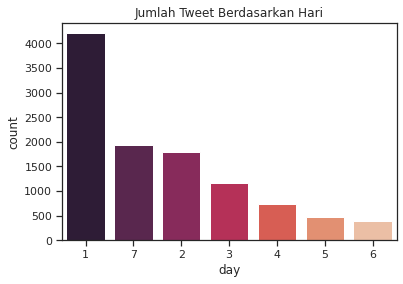

In [ ]:
sns.countplot(x="day",data=df2,palette="rocket",order=df2.day.value_counts().iloc[:7].index).set(title="Jumlah Tweet Berdasarkan Hari")

Keterangan:

1: Senin

2: Selasa

3: Rabu

4: Kamis

5: Jumat

6: Sabtu

7: Minggu

Berdasarkan *countplot* di atas, terlihat bahwa *tweet* terbanyak mengenai piala dunia 2022 berada pada hari Senin.

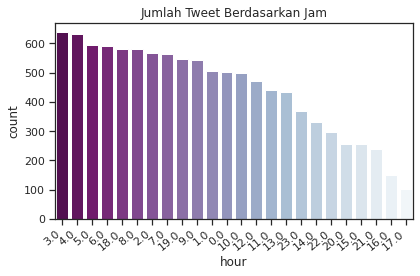

In [ ]:
p = sns.countplot(x="hour",data=df2, palette="BuPu_r",order=df2.hour.value_counts().iloc[:24].index)
p.set(title="Jumlah Tweet Berdasarkan Jam")
p.set_xticklabels(p.get_xticklabels(),rotation=40,ha='right')
plt.tight_layout()
plt.show()

Keterangan:

Satuan waktu yang digunakan adalah 24 jam sehari.

Berdasarkan *plot* di atas, diperoleh bahwa tweet terbanyak mengenai piala dunia 2022 berada pada jam 3 pagi, mengingat final piala dunia berakhir sekitar pukul tersebut.

In [ ]:
url = 'https://raw.githubusercontent.com/lidyaanggreni/FinalProjectDatminGroupD/main/cleaned_tweet_1_.csv'
df4 = pd.read_csv(url,sep=',')
df4

,clean tweet
0,piala dunia qatar 2022 pilih piala dunia baik ...
1,wasit pimpin tanding final piala dunia 2022 ti...
2,hakim ziyech milik banyak kisah tarik hingga b...
3,chelsea senang piala dunia 2022 akhir
4,laga perdana manchester united premier league ...
...,...
11002,messi whatafinal lionel argentina pialadunia20...
11003,puas banget nonton piala dunia 2022 plot twist...
11004,idextratime luar biasa final mengseru congrats...
11005,asa kejar argentina perancis babak argentina b...


In [ ]:
from nltk.util import ngrams
#remove words with len <2
df4['clean tweet']=df4['clean tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>2]))

#tokenization
tokenized_tweet = df4['clean tweet'].apply(lambda x: list(ngrams(x.split(),2)))

tokenized_tweet

0        [(piala, dunia), (dunia, qatar), (qatar, 2022)...
1        [(wasit, pimpin), (pimpin, tanding), (tanding,...
2        [(hakim, ziyech), (ziyech, milik), (milik, ban...
3        [(chelsea, senang), (senang, piala), (piala, d...
4        [(laga, perdana), (perdana, manchester), (manc...
                               ...                        
11002    [(messi, whatafinal), (whatafinal, lionel), (l...
11003    [(puas, banget), (banget, nonton), (nonton, pi...
11004    [(idextratime, luar), (luar, biasa), (biasa, f...
11005    [(asa, kejar), (kejar, argentina), (argentina,...
11006    [(selamat, argentina), (argentina, juara), (ju...
Name: clean tweet, Length: 11007, dtype: object

In [ ]:
from functools import reduce
from collections import Counter
l = reduce(lambda x, y: list(x)+list(y), zip(tokenized_tweet))
flatten = [item for sublist in l for item in sublist]

counts = Counter(flatten).most_common()

df5 = pd.DataFrame.from_records(counts,columns=['Phrase','Count'])
df5['Phrase']=df5['Phrase'].apply(lambda x: ' '.join([w for w in x]))

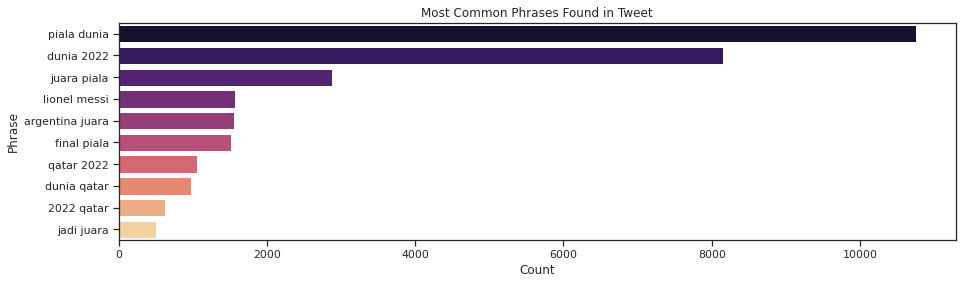

In [ ]:
df5 = df5.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df5, x="Count",y='Phrase',palette="magma")
ax.set(title="Most Common Phrases Found in Tweet")
ax.set(ylabel='Phrase')
plt.show()

Dari grafik diatas frase yang paling sering muncul adalah "piala dunia"

#SNA

In [ ]:
users = df.user.to_list()
tweets = df.tweet.to_list()
print( users[:7] )

['idntimes', 'nandaputrafbs', 'idntimes', 'NOGOAL_STUDIO', 'DeandraSlavina', 'TawafTv', 'DeandraSlavina']


In [ ]:
#contoh tweet nya
print( tweets[:3] )

['Pemain Polandia dengan Menit Bermain Terbanyak di Piala Dunia 2022  https://t.co/S7OdxZp7i6', 'Kylian Mbappe Sudah Lupakan Piala Dunia 2022, Fokus Bawa PSG Raih Prestasi  #KylianMbappe #PialaDunia2022 #PSG   https://t.co/t24WigW6AM lewat @Holopis.com', '6 Pemain Timnas Kroasia dengan Caps Tersedikit di Piala Dunia 2022  https://t.co/v3YfPCwAEy']


In [ ]:
#membuat graph kosong
G = nx.Graph() # Graph Kosong Baru
G.add_nodes_from(users)

In [ ]:
#mencari mention dalam text
import re

t = "the text"
mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)

mentionS

[]

In [ ]:
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)
            
print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  4266
Banyak Edges =  1054


In [ ]:
#mengekspor data ke format GeXF, lalu selanjutnya dilakukan analisis dengan software Gephi
print("Export ke GexF untuk di import ke Gephi")
nx.write_gexf(G, "pialadunia.gexf")

Export ke GexF untuk di import ke Gephi


##Hasil Gephi
hasil pengolahan data di gephi adalah sebagai berikut:


###Filtering
setelah filtering didapatkan node dan edges sejumlah:

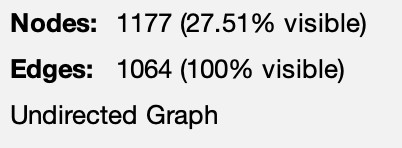

###Modularity
Modularitas adalah ukuran struktur grafik, mengukur kepadatan koneksi dalam modul atau komunitas. Semakin besar skor modularity maka semakin jelas 
kelompok yang terbentuk. 

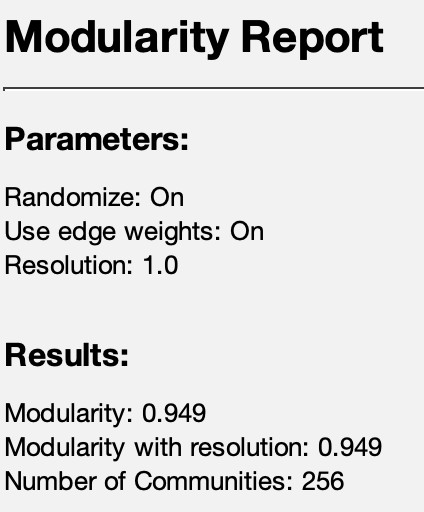

Pada data didapatkan modularity yang cukup tinggi, yaitu sebesar 0.949 yang mana artinya data telah tercluster dengan cukup baik.

###Grafik

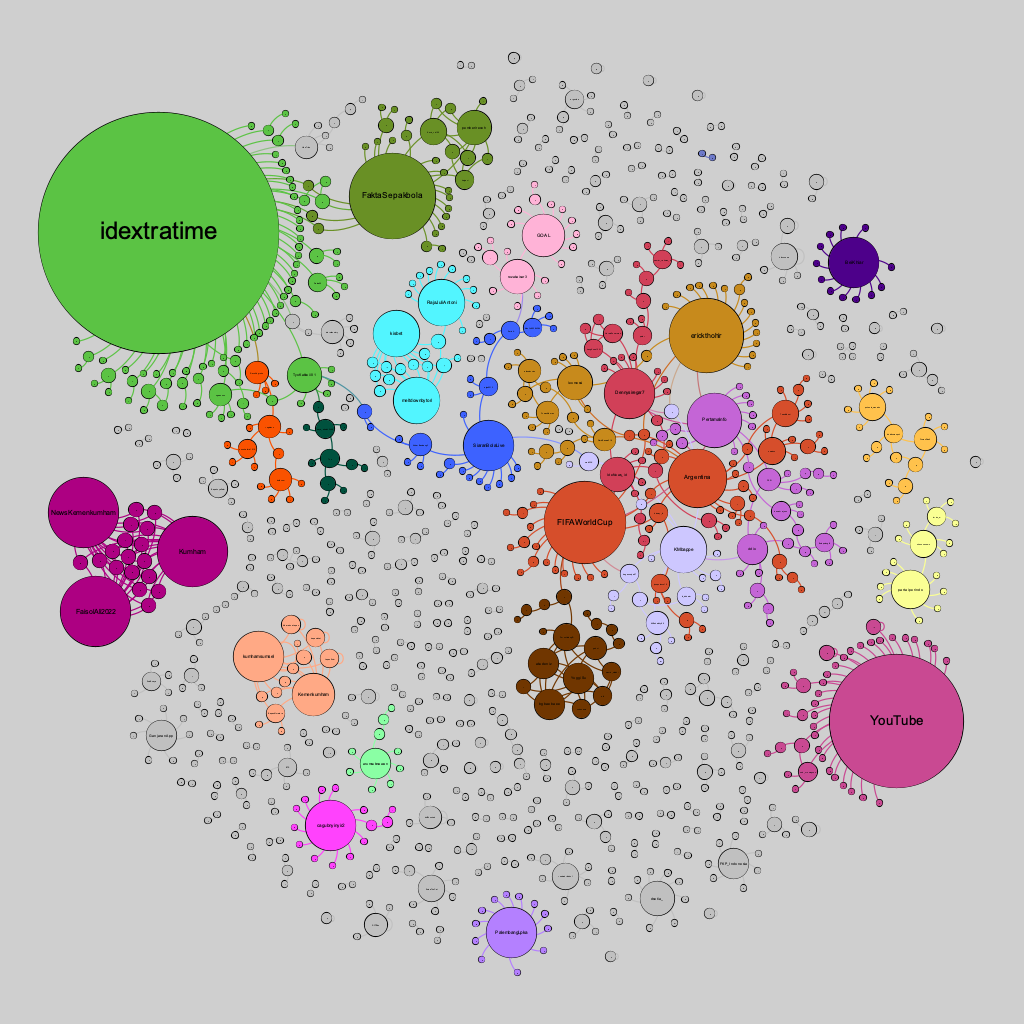

*   Dari gambar di atas akun-akun yang banyak dimention contohnya idextratime, Youtube, FIFAWorldCup,FaktaSepakBola, Argentina, ericktohir, PalembangLPKA, cagubnyinyir2, arumsukmawan
*   warna hijau mengelompokan jaringan yang berinteraksi(dlm bentuk mention) dengan aktor utama @idextratime, warna hijau tua mengelompokan jaringan yang berinteraksi dengan aktor utama @FaktaSepakBola, interpretasi yang lain serupa
*  @idextratime adalah salah satu akun yang memberikan informasi seputar sepak bola dengan 573.1K followers. Akun ini sering menjadi sorotan publik karena pesan-pesan kontroversialnya, seperti mengkritik tim, pemain, dan wasit.
* Yang memention @idextratime banyak mengomentari tentang Argentina yang menjadi pemenang piala dunia 2022 dan banyak membicarakan Messi dan Ronaldo 

* Youtube banyak dimention sebagai tempat menonton video recap mengenai piala dunia,
contoh tweet :
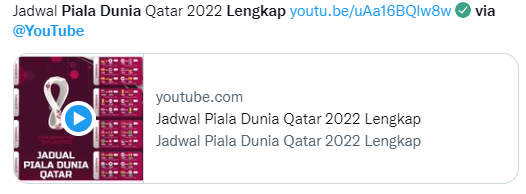

###Degree Centrality

Analisis degree centrality berguna untuk menentukan user yang 
paling berperan berdasarkan banyaknya edges atau hubungan interaksi 
yang terjadi antar node yang satu dengan node lainnya. Berikut tabel 
dengan lima user dengan nilai peringkat yang memiliki degree centrality 
yang tertinggi:

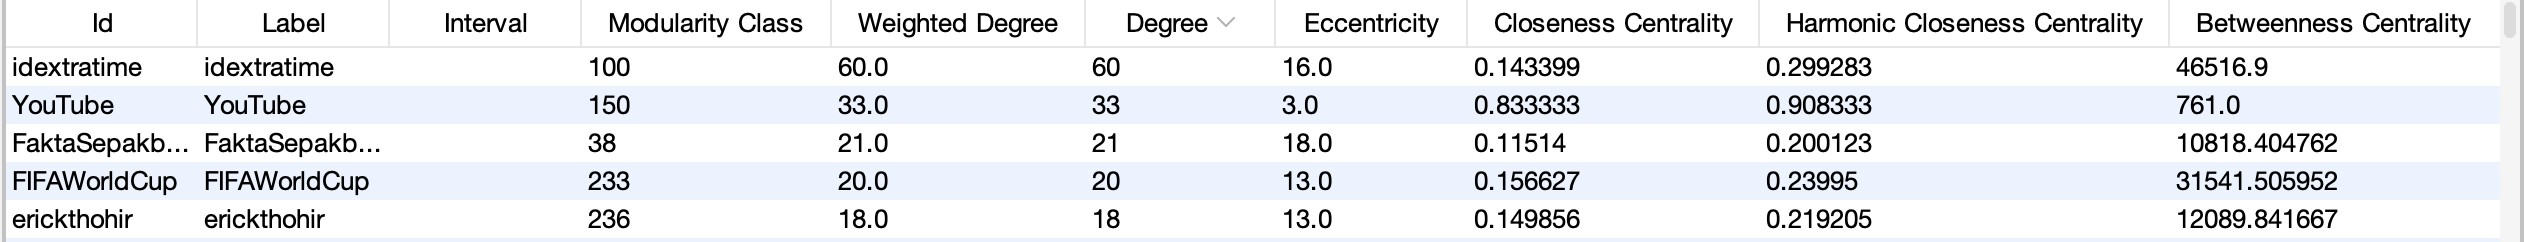

Berdasarkan tabel diatas, diperoleh kesimpulan bahwa akun twitter atau user paling berpengaruh adalah user bernama idextratime dengan nilai Degree Centrality sebesar 60, diikuti user bernama Youtube dengan nilai 33, user FaktaSepakbola dengan nilai 21, user FIFAWorldCup dengan nilai 20, dan erickthohir dengan nilai 18. Hal ini menandakan bahwa lima user tersebut merupakan user yang memiliki hubungan yang kuat dalam setiap user. 

###Betweenness Centrality

Analisis Betweenness Centrality berguna menentukan seberapa 
sering suatu node dilewati dan dilalui sebuah node lain untuk menuju ke 
node lainnya dan untuk mengetahui posisi atau letak Node didalam suatu 
network dimana node tersebut tidak boleh kosong atau hilang, karena 
jika tidak ada node maka akan terjadi suatu kesalahan dalam interaksi 
yang terjadi dalam jaringan. Berikut tabel lima user dengan nilai 
peringkat aktor Betweenness Centrality yang tertinggi

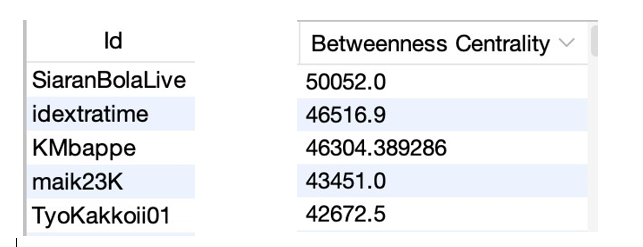

Berdasarkan tabel diatas, disimpulkan bahwa
bahwa akun twitter atau user yang paling sering dilewati node lainnya 
adalah akun SiaranBolaLive, dengan memiliki nilai Betweeneess 
centrality sebesar 500052, kemudian diikuti user idextratime dengan nilai sebesar 46516, akun bernama KMbappe dengani nilai 
46304.39, lalu akun bernama maik23K dengan nilai 43451, dan akun 
bernama TyoKakkoii01 dengan nilai sebesar 42672.5. Hal ini 
mengidentifikasikan bahwa 5 user ini merupakan user favorit 
didalam jaringan karena memiliki kemampuan sebagai perantara dan 
penghubung bagi banyak user lain.


###Closeness Centrality


Closenness Centrality berguna untuk mengukur 
kecepatan koneksi dengan menghitung jarak terpendek dari user ke 
semua user lainnya dalam suatu jaringan. Berikut tabel lima user 
dengan nilai peringkat user Closeneess Centrality yang tertinggi :

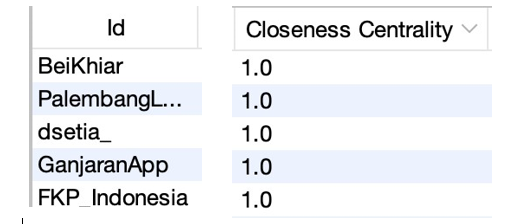

Berdasarkan tabel diatas, disimpulkan 
bahwa akun twitter atau user yang dapat menjangkau node node lainnya 
yang mempunyai jalur terpendek dalam interaksi. Hal itu terdapat pada 
user bernama BeiKhiar, PalembangLPKA, dsetia_, GanjaranAPp, FKP_Indonesia dengan nilai closenness centrality 1

#Kesimpulan SNA

Dari hasil penelitian ini dapat disimpulkan bahwa:
* Terdapat 1177 node akun dalam jaringan dataset piala dunia dan 
Edges 1064 yang melakukan interkasi dalam jaringan tersebut
* Perhitungan Centrality pada Social Network menggunakan 
media sosial Twitter untuk melihat user yang paling 
berpengaruh dalam interaksi, maupun penyebaran koneksi 
merupakan solusi dalam proses perhitungan dalam penentuan 
Central dari suatu jaringan sosial.
* Dari modularity, data telah cenderung tercluster.
* User yang memiiki peran paling berpengaruh dalam 
jaringan sosial dengan kata kunci piala dunia adalah user bernama idextratime. User ini memiliki peringkat tertinggi pada Degree Centrality, peringkat 
ke dua dalam Betweeneess Centrality. 
* Dataset jaringan sosial ini dapat 
berguna untuk  mengetahui suatu topik pembahasan tentang piala dunia yang sedang dibicarakan.

#Peran Setiap Anggota Kelompok
**Kelompok D**
1. Azizah Annurohmah (2006572983) \
Diskusi bersama, EDA, mengerjakan SNA, presentasi, edit video.
2. Natania Agustin (2006572895) \
Diskusi bersama, scraping data, mengerjakan SNA, presentasi, membuat ppt.
3. Ni Made Lidya Anggreni (2006522700) \
Ketua kelompok, diskusi bersama, mengerjakan visualisasi dengan voyant, presentasi, membuat ppt.
4. Siskawati Simandalahi (2006572970) \
Diskusi bersama, mengerjakan visualisasi dengan voyant, presentasi, membuat ppt.
5. Yemima Kathleen Monica (2006528982) \
Diskusi bersama, mengerjakan visualisasi dengan voyant, presentasi, membuat ppt.
6. Yovela Natalia Yvone (2006463894) \
Diskusi bersama, cleaning data, mengerjakan SNA, presentasi, membuat ppt.